STUDENT RESULTS ANALYSIS
=========

__IMPORTING LIBRARIES__

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("students.csv")

print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


__checking for null values__

In [4]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

__• Drop unnamed column__


In [5]:
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


__• gender distribution__

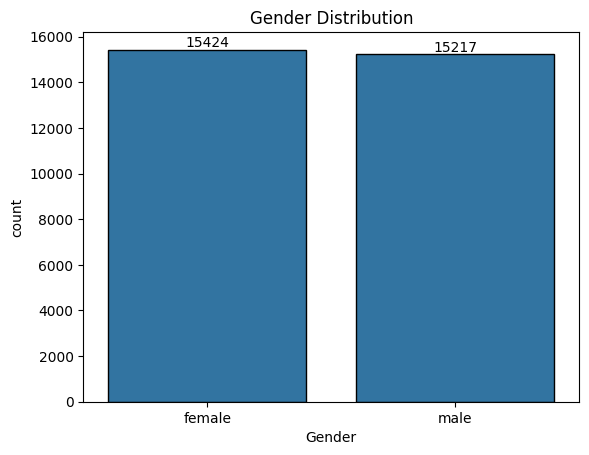

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
a=sns.countplot(data=df,x="Gender",edgecolor="black")
a.bar_label(a.containers[0])
plt.title("Gender Distribution")
plt.show()
fig = a.get_figure()
fig.savefig("1.png")

__• We have concluded that number of females are higher than number of males__

In [7]:
group=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(group)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


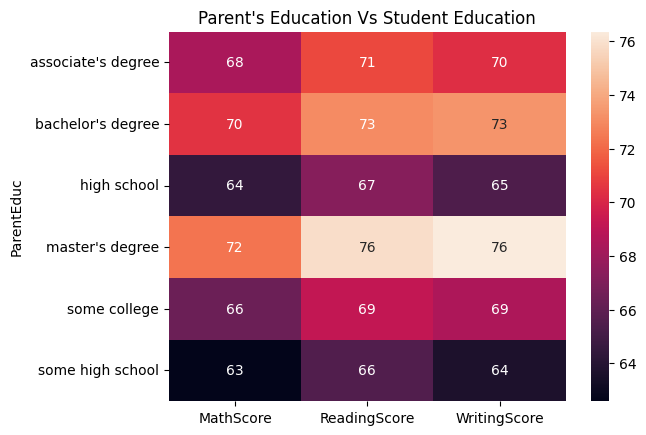

In [23]:
a=sns.heatmap(group,annot=True)
plt.title("Parent's Education Vs Student Education")
plt.show()
fig = a.get_figure()
fig.savefig("2.png")

__• we have concluded that there is huge impact of parents education on marks acheived by students__

In [9]:
group1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(group1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


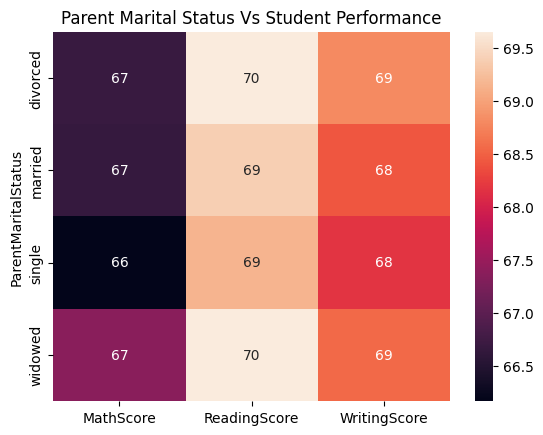

In [24]:
a=sns.heatmap(group1,annot=True)
plt.title("Parent Marital Status Vs Student Performance")
plt.show()
fig = a.get_figure()
fig.savefig("3.png")

__• we have concluded that there is negligible or no impact on studies due to the parent marital status__


In [11]:
group2=df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(group2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


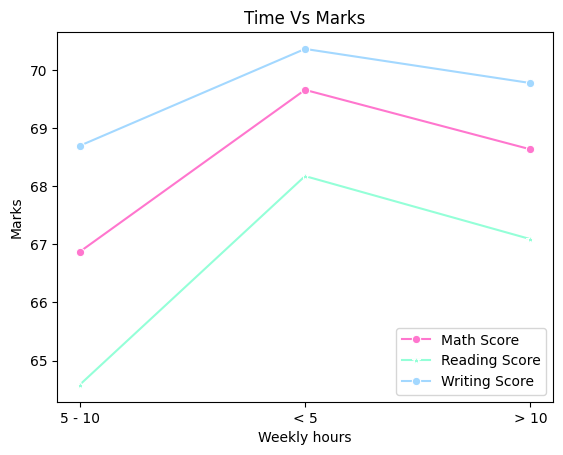

In [25]:
a=sns.lineplot(data=group2,x=group2.index,y=group2.values[0],marker="o",color="#FF76CE",label="Math Score",)


a=sns.lineplot(data=group2,x=group2.index,y=group2.values[1],marker="*",color="#94FFD8",label="Reading Score")


a=sns.lineplot(data=group2,x=group2.index,y=group2.values[2],marker="o",color="#A3D8FF",label="Writing Score")
plt.xlabel("Weekly hours")
plt.ylabel("Marks")
plt.title("Time Vs Marks")
plt.legend()
plt.plot()
fig = a.get_figure()
fig.savefig("4.png")



__• we have concluded that maxium of students studying less than 5hours per week are scoring high in all .__


In [13]:
group3=df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(group3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


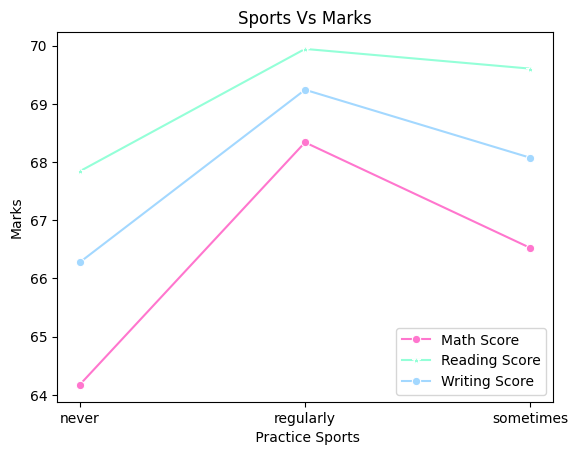

In [26]:
a=sns.lineplot(data=group3,x=group3.index,y=group3.values[0],marker="o",color="#FF76CE",label="Math Score",)


a=sns.lineplot(data=group3,x=group3.index,y=group3.values[1],marker="*",color="#94FFD8",label="Reading Score")


a=sns.lineplot(data=group3,x=group3.index,y=group3.values[2],marker="o",color="#A3D8FF",label="Writing Score")
plt.xlabel(" Practice Sports")
plt.ylabel("Marks")
plt.title("Sports Vs Marks")
plt.legend()
plt.plot()
fig = a.get_figure()
fig.savefig("5.png")



__• we have concluded that students who practice sports regularly & sometimes are active in scoring good marks compared to other__

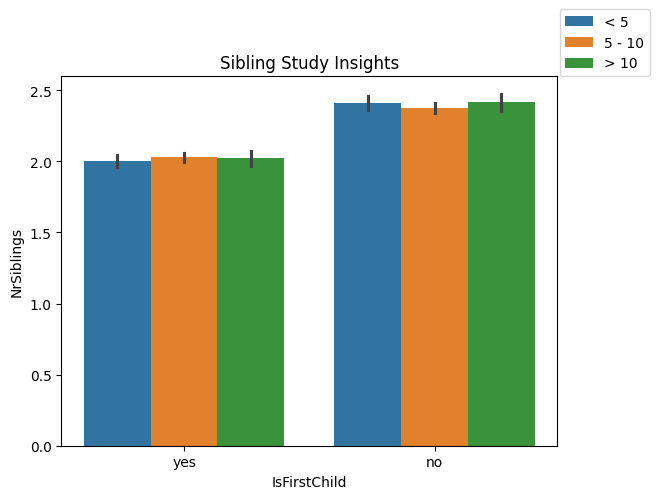

In [27]:
a=sns.barplot(data=df,x="IsFirstChild",y="NrSiblings",hue="WklyStudyHours")
plt.title("Sibling Study Insights")
plt.plot()
plt.legend(bbox_to_anchor=(1.2,1.2))
fig = a.get_figure()
fig.savefig("6.png")

__• we have conclude that the students who are first child with 2 sibilings are mostly sparing 5-10 hrs and <5hours is being spent by few students who are not first child with siblings greater than 2 are and >10 hrs being spent by few.__

In [16]:
group4=df.groupby("EthnicGroup")["Gender"].count()
print(group4)


EthnicGroup
group A    2219
group B    5826
group C    9212
group D    7503
group E    4041
Name: Gender, dtype: int64


<Figure size 640x480 with 0 Axes>

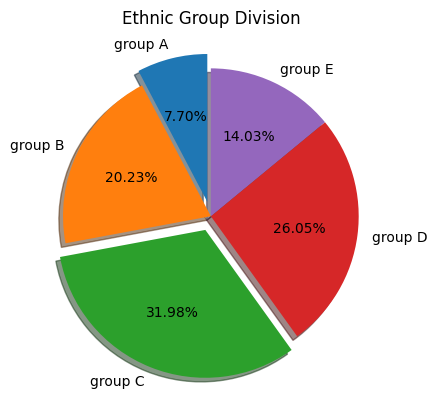

In [32]:
plt.pie(x=group4.values,labels=group4.index,shadow=True,startangle=90,autopct="%.2f%%",explode=[0.1,0,0.1,0,0])
plt.title("Ethnic Group Division")

plt.show()

fig.savefig("7.png")

__• we have concluded there are more students who belong to group C then group D ,group B .The least number of students belongs to group A.__

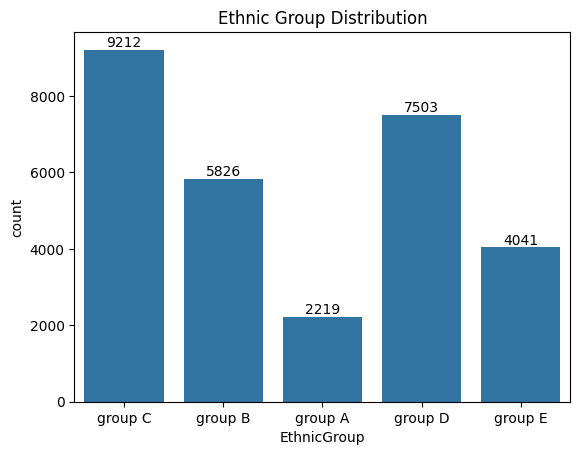

In [33]:
a=sns.countplot(data=df,x="EthnicGroup")
a.bar_label(a.containers[0])
plt.title("Ethnic Group Distribution")
plt.show()
fig = a.get_figure()
fig.savefig("8.png")

••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••